<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.**

# K-Nearest Neighbor Solution

### 1. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

### 2. Importing the dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3. Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [5]:
print(X_train)

[[ 13.    129.      0.    ...  39.9     0.569  44.   ]
 [  4.    129.     86.    ...  35.1     0.231  23.   ]
 [  3.     61.     82.    ...  34.4     0.243  46.   ]
 ...
 [ 10.    101.     86.    ...  45.6     1.136  38.   ]
 [  0.    141.      0.    ...  42.4     0.205  29.   ]
 [  0.    125.     96.    ...  22.5     0.262  21.   ]]


In [6]:
print(y_train)

[1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1
 0 0 1 1 0 0 0 0 1 1 0 1 

In [7]:
print(X_test)

[[  6.     98.     58.    ...  34.      0.43   43.   ]
 [  2.    112.     75.    ...  35.7     0.148  21.   ]
 [  2.    108.     64.    ...  30.8     0.158  21.   ]
 ...
 [  6.    123.     72.    ...  33.6     0.733  34.   ]
 [  3.     78.     50.    ...  31.      0.248  26.   ]
 [  3.    106.     72.    ...  25.8     0.207  27.   ]]


In [8]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0]


### 4. Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 2.80346794  0.25977903 -3.78077929 ...  1.03974028  0.29608546
   0.96352088]
 [ 0.07832678  0.25977903  0.89724451 ...  0.40945373 -0.70087555
  -0.86295593]
 [-0.22446668 -1.85825286  0.67966201 ...  0.31753694 -0.66548048
   1.13747105]
 ...
 [ 1.89508755 -0.61235174  0.89724451 ...  1.78820556  1.96850229
   0.44167036]
 [-1.13284707  0.63354937 -3.78077929 ...  1.36801453 -0.77756486
  -0.34110542]
 [-1.13284707  0.13518892  1.44120077 ... -1.24504846 -0.6094383
  -1.03690611]]


In [11]:
print(X_test)

[[ 0.6839137  -0.70579433 -0.625833   ...  0.26501306 -0.11390738
   0.87654579]
 [-0.52726014 -0.26972894  0.29889263 ...  0.48823955 -0.94569142
  -1.03690611]
 [-0.52726014 -0.39431905 -0.29945925 ... -0.15517797 -0.91619553
  -1.03690611]
 ...
 [ 0.6839137   0.07289387  0.13570575 ...  0.21248918  0.77981801
   0.09377001]
 [-0.22446668 -1.32874488 -1.06099801 ... -0.12891603 -0.65073254
  -0.60203068]
 [-0.22446668 -0.45661411  0.13570575 ... -0.81172646 -0.77166568
  -0.51505559]]


### 5. Hyperparameter tuning for a K_NN  model using scikit-learn's GridSearchCV

In [12]:
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1, 51),  
    "metric" : ['minkowski', 'manhattan', 'chebyshev'],
    "p":[1, 2]
}
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

### 6. Train the K-Nearest Neighbour  model

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'chebyshev'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'p': [1, 2]},
             scoring='accuracy')

### 7. Best Hyperparameters

In [14]:
Best_Hyperparameters =  grid_search.best_params_
Best_Hyperparameters

{'metric': 'minkowski', 'n_neighbors': 9, 'p': 2}

### 8. Accuracy

In [15]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.6770833333333334


### 9. Classification Report

In [16]:
from sklearn.metrics import  confusion_matrix, classification_report
y_pred = best_model.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       123
           1       0.56      0.51      0.53        69

    accuracy                           0.68       192
   macro avg       0.65      0.64      0.64       192
weighted avg       0.67      0.68      0.67       192



### 10. Create Confusion Matrix using testing data and prediction data

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[95 28]
 [34 35]]


### 11.Visualising the Confusion Matrix  result
 

Text(95.72222222222221, 0.5, 'Truth')

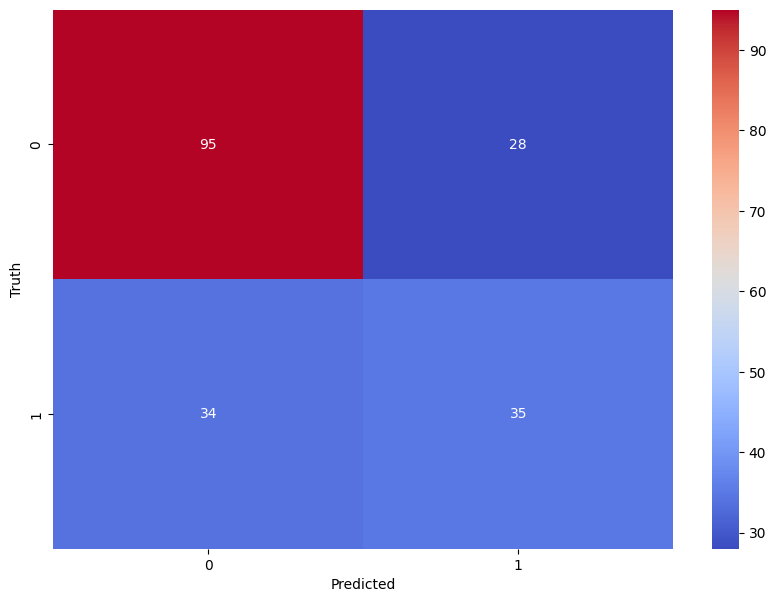

In [18]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')